In [1]:
#Importing Libraries 
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pathlib
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
directory = r"C:\Users\user\Desktop\Current Projects\new_dataset\train"
folders = os.listdir(directory)
print(folders)

['cheetah_train', 'jaguar_train']


In [4]:
image_size = 300

data = []
import cv2
for folder in folders:
    folder_path = os.path.join(directory,folder)
    label = folders.index(folder)
    print(folder_path)
    print("Label:", label)
    
    for image in os.listdir(folder_path):
        image_path = os.path.join(folder_path,image)
        image_arr = cv2.imread(image_path)
        image_arr = cv2.resize(image_arr,(image_size,image_size))
        data.append([image_arr,label])

C:\Users\user\Desktop\Current Projects\new_dataset\train\cheetah_train
Label: 0
C:\Users\user\Desktop\Current Projects\new_dataset\train\jaguar_train
Label: 1


In [5]:
len(data)

1800

In [6]:
X = []
y = []

#dividing features and labels to X and y respectively.

for features, labels in data:
    X.append(features)
    y.append(labels)

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
X = X.astype('float32')
X = X / 255.0

In [9]:
X.shape,y.shape

((1800, 300, 300, 3), (1800,))

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
sss.get_n_splits(X, y)   

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [52]:
len(X_train), len(X_test),len(y_train),len(y_test)

(1620, 180, 1620, 180)

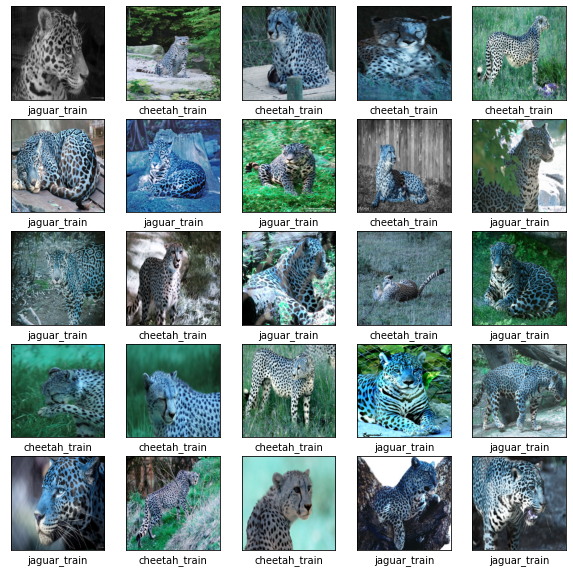

In [53]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(folders[y_train[i]])
plt.show()

In [54]:
num_classes = 2

model = tf.keras.Sequential([
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

In [55]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [56]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/30
51/51 [==============================] - 1261s 23s/step - loss: 0.9889 - accuracy: 0.5161 - val_loss: 0.6662 - val_accuracy: 0.6167507 - ETA: 2:11:16 - loss: 1.3804 - accuracy: 0.49 - ETA: 1:39:40 - loss: 1.5158 - accuracy: 0.49 - ETA: 1:18:39 - loss: 1.4967 - accuracy: 0.490 - ETA: 1:10:44 - loss: 1.4759 - accuracy: 0.487 - ETA: 1:03:53 - loss: 1.4518 - accuracy: 0.487 - ETA: 57:40 - loss: 1.4270 - accuracy: 0.486 - ETA: 42:38 - loss: 1.3558 - accurac
Epoch 2/30
51/51 [==============================] - 367s 7s/step - loss: 0.6130 - accuracy: 0.6560 - val_loss: 0.6140 - val_accuracy: 0.7722
Epoch 3/30
51/51 [==============================] - 364s 7s/step - loss: 0.4884 - accuracy: 0.7886 - val_loss: 0.5203 - val_accuracy: 0.7556
Epoch 4/30
51/51 [==============================] - 355s 7s/step - loss: 0.4127 - accuracy: 0.8167 - val_loss: 0.4759 - val_accuracy: 0.7889
Epoch 5/30
51/51 [==============================] - 352s 7s/step - loss: 0.3720 - accuracy: 0.8400 - val_loss

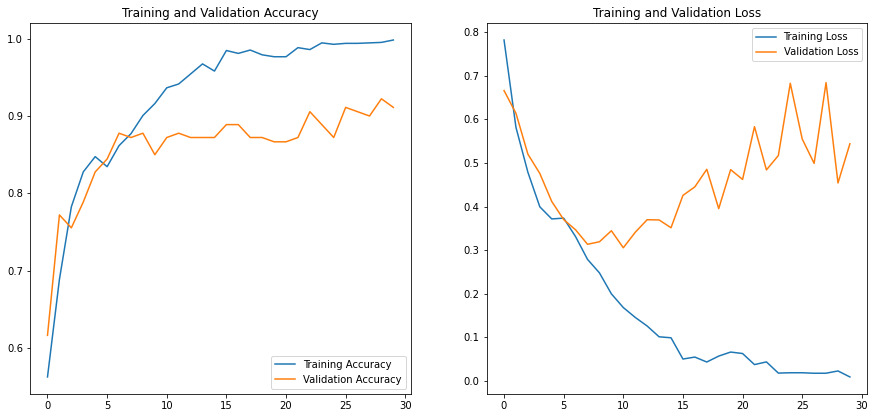

In [58]:
#Visualisation of training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 91.11%
